In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Import Loan data  

Loandata = pd.read_csv(r"D:\00 Datasets\K_Mean_Clustering\Bank_Loan_V1.0.csv", header=0)

# Copy to back-up file

Loandata_bk = Loandata.copy()

# Display first 5 records

Loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [4]:
# Display the dataset information

Loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [5]:
# Check for missing values

Loandata.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

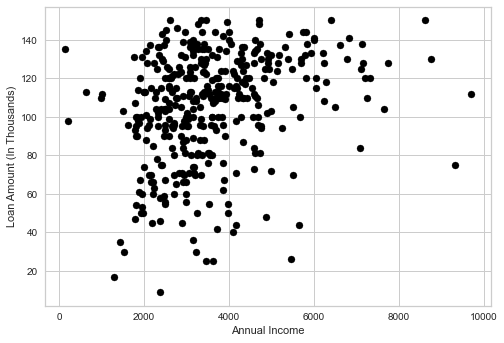

In [35]:
# We will be taking only two variables from the data – “LoanAmount” and “ApplicantIncome”. 

x = Loandata[["LoanAmount","ApplicantIncome"]]

# Visualise data points

plt.scatter(X["ApplicantIncome"], X["LoanAmount"],c='black')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

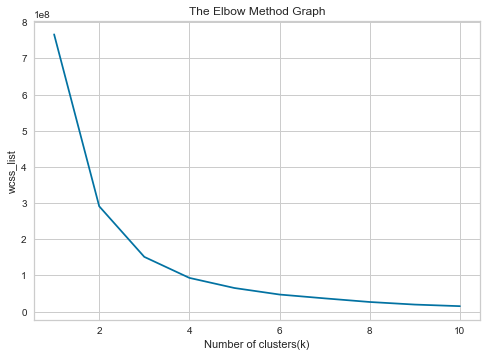

In [36]:
# Finding the optimal number of clusters using the elbow method

from sklearn.cluster import KMeans  

wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [42]:
# Traini the K-means algorithm on the training dataset
 
KM = KMeans(n_clusters=4, init='k-means++', random_state= 42)

y_pred = KM.fit_predict(x)  

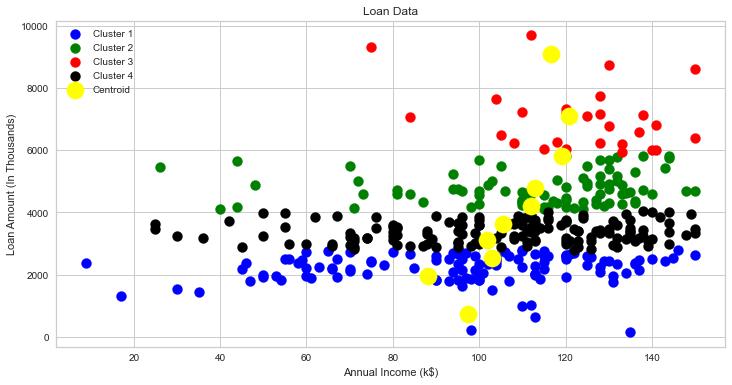

In [44]:
# Visulaizing the clusters 

x = np.array(x)
plt.figure(figsize=(12,6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'black', label = 'Cluster 4') #for fourth cluster      
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Loan Data')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Loan Amount (In Thousands)')  
plt.legend()  
plt.show()    

In [48]:
# Calculate Silhoutte Score

from sklearn.metrics import silhouette_samples, silhouette_score

Sscore = silhouette_score(x, KM.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % Sscore)

Silhouetter Score: 0.544


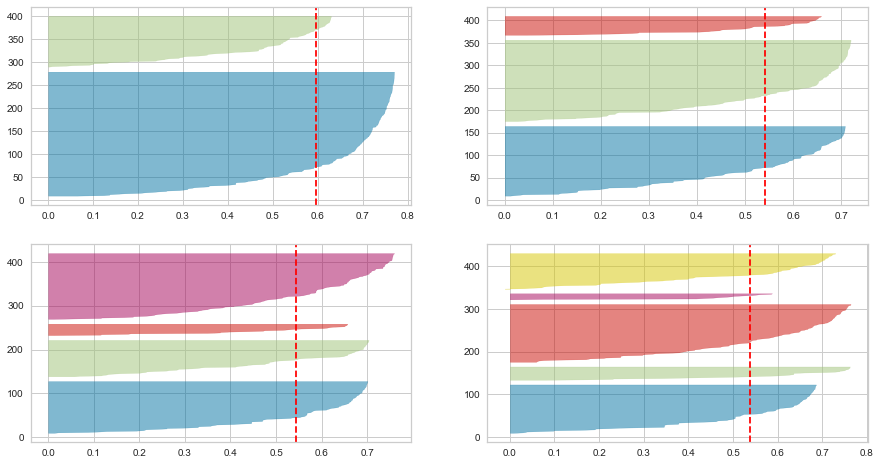

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    KM = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(KM, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

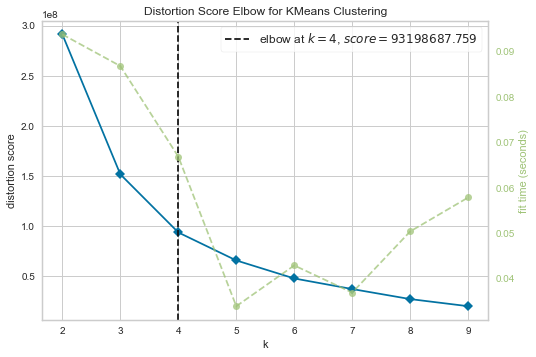

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer

# Identify the 2 independent variables

x = Loandata_bk[['ApplicantIncome', 'LoanAmount']]

# Instantiate the clustering model and visualizer

KM = KMeans(random_state=42)
visualizer = KElbowVisualizer(KM, k=(2,10))
 
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure